In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import numpy as np
import laminate

╒════════════════════════════════╤═══════════════════════════════════╤══════════════════════════════════╕
│ A Matrix                       │ B Matrix                          │ D Matrix                         │
╞════════════════════════════════╪═══════════════════════════════════╪══════════════════════════════════╡
│ [[1.09e+11 4.24e+10 0.00e+00]  │ [[-5.96e-06 -2.38e-06 -1.43e-06]  │ [[5.50e+09 3.23e+09 -1.05e+09]   │
│  [4.24e+10 1.09e+11 0.00e+00]  │  [-2.38e-06 -5.96e-06 -1.43e-06]  │  [3.23e+09 5.50e+09 -1.05e+09]   │
│  [0.00e+00 0.00e+00 3.20e+10]] │  [-4.77e-07 -4.77e-07 -9.54e-07]] │  [-5.23e+08 -5.23e+08 4.82e+09]] │
╘════════════════════════════════╧═══════════════════════════════════╧══════════════════════════════════╛
╒════════════╤══════════╕
│ Property   │    Value │
╞════════════╪══════════╡
│ Ex         │ 1.09e+11 │
├────────────┼──────────┤
│ Ey         │ 1.09e+11 │
├────────────┼──────────┤
│ Gxy        │ 3.2e+10  │
├────────────┼──────────┤
│ vxy        │ 0.389    

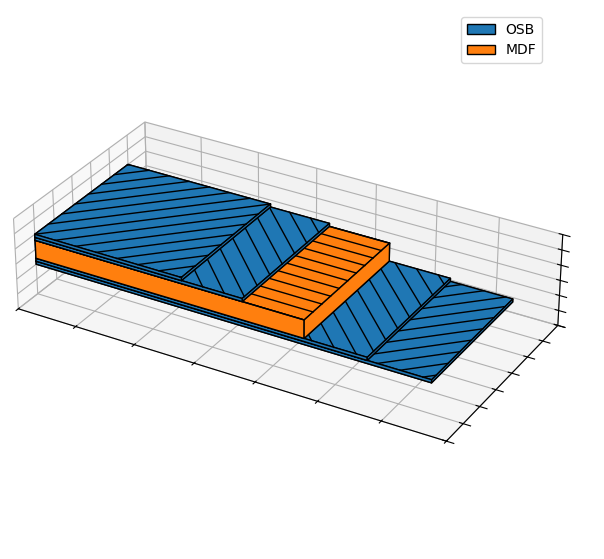

In [7]:
layers = [
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta':  45, 'thickness': 0.10},
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta': -45, 'thickness': 0.10},
    {'name': "MDF", 'E1': 140e9, 'E2': 140e9, 'G12': 5e9, 'v12': 0.3, 'theta':   0, 'thickness': 0.60},
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta': -45, 'thickness': 0.10},
    {'name': "OSB", 'E1': 140e9, 'E2': 10e9, 'G12': 5e9, 'v12': 0.3, 'theta':  45, 'thickness': 0.10}
]

Lam = laminate.Laminate(layers)
Lam.print_results()
Lam.plot()

In [9]:
laminate_analysis = laminate.LaminateLoadAnalysis(Lam)

midplane_strains, midplane_curvatures = laminate_analysis.apply_load(Nx=1000, Ny=0, Nxy=0)

ply_strains, ply_stresses = laminate_analysis.compute_ply_stresses_strains(midplane_strains, midplane_curvatures)

laminate_analysis.print_ply_results(ply_strains, ply_stresses)


Dehnungen pro Schicht:
╒═══════════╤══════════╤══════════╤═══════════╕
│   Schicht │      Exx │      Eyy │       Gxy │
╞═══════════╪══════════╪══════════╪═══════════╡
│         1 │ 1.08e-08 │ -4.2e-09 │ -6.18e-25 │
├───────────┼──────────┼──────────┼───────────┤
│         2 │ 1.08e-08 │ -4.2e-09 │ -4.81e-25 │
├───────────┼──────────┼──────────┼───────────┤
│         3 │ 1.08e-08 │ -4.2e-09 │  6.37e-41 │
├───────────┼──────────┼──────────┼───────────┤
│         4 │ 1.08e-08 │ -4.2e-09 │  4.81e-25 │
├───────────┼──────────┼──────────┼───────────┤
│         5 │ 1.08e-08 │ -4.2e-09 │  6.18e-25 │
╘═══════════╧══════════╧══════════╧═══════════╛

Spannungen pro Schicht:
╒═══════════╤═══════╤═══════╤═════════════╕
│   Schicht │   Sxx │   Syy │         Txy │
╞═══════════╪═══════╪═══════╪═════════════╡
│         1 │   297 │   222 │ -216        │
├───────────┼───────┼───────┼─────────────┤
│         2 │   297 │   222 │  216        │
├───────────┼───────┼───────┼─────────────┤
│         3 │  1470

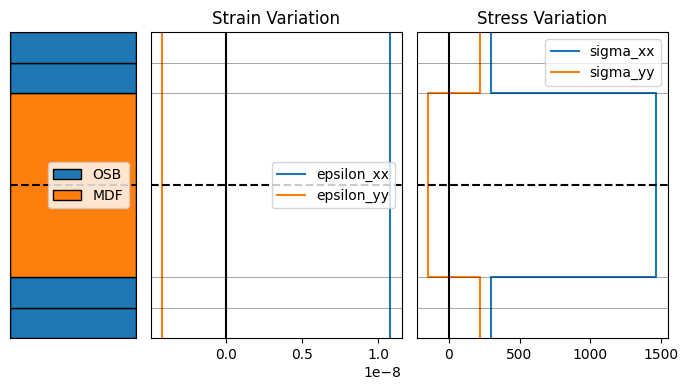

In [10]:
laminate_analysis.plot_stress_strain_variation() 